<h1><center>ST3233: Year 2020-2021</center></h1>
<h1><center> Final Project </center></h1>
<h2><center> Group Number: 12 </center></h2>
<h2><center> Group Member 1: Nishanth Elango, A0184373Y </center></h2>
<h2><center> Group Member 2: Divakaran Haritha, A0187915N </center></h2>

<h3>Introduction</h3>
<p>The dataset used in this project will be the weather statistics of Austin, Texas in USA. Taken from: <a href="url" target="https://www.kaggle.com/grubenm/austin-weather">Source</a>. The goal of this project is to predict the <strong>average</strong> temperature 2 days in advance(forecasting) by using linear regression. We will also be doing STL decomposition and trend analysis. Note that the temperature is in Farenheit.</p>

In [626]:
%matplotlib inline
import pylab as plt
import numpy as np
import pandas as pd
import datetime
from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics import tsaplots
import statsmodels
from statsmodels.tsa.api import SimpleExpSmoothing

In [86]:
data = pd.read_csv("austin_weather.csv")

In [87]:
data.drop(data.head(1).index, inplace=True)
data.drop(['PrecipitationSumInches', 'Events'], axis=1, inplace=True)
data.dropna(inplace=True)
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH
1,2013-12-22,56.0,48.0,39.0,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25
2,2013-12-23,58.0,45.0,32.0,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12
3,2013-12-24,61.0,46.0,31.0,36,28,21,89,56,22,30.56,30.45,30.3,10,10,7,12,4,20
4,2013-12-25,58.0,50.0,41.0,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16
5,2013-12-26,57.0,48.0,39.0,39,36,33,79,63,47,30.47,30.4,30.34,10,9,7,12,3,17


### General Trend
We plot the graph of average temperature of the day vs number of datapoints to see the shape of the trend below. Referenced code from Chapter 6 code snippets.

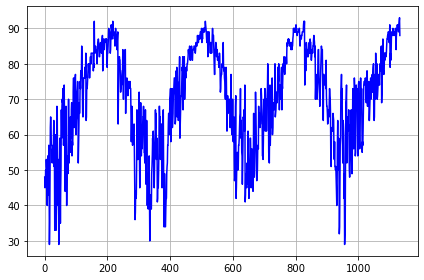

In [95]:
plt.plot(data.values[:,2], "b-")
plt.grid(True)
plt.tight_layout()

### STL Decomposition

In [116]:
avg_temp = data["TempAvgF"][:].values
decomp = STL(avg_temp, period=12, robust=True ).fit()

In [117]:
S,T,E = decomp.seasonal, decomp.trend, decomp.resid

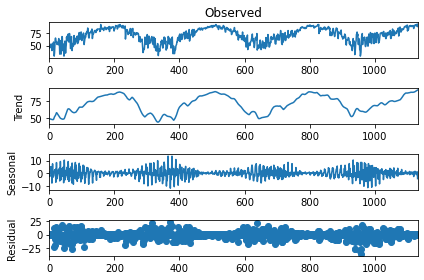

In [118]:
decomp.plot()
plt.show()

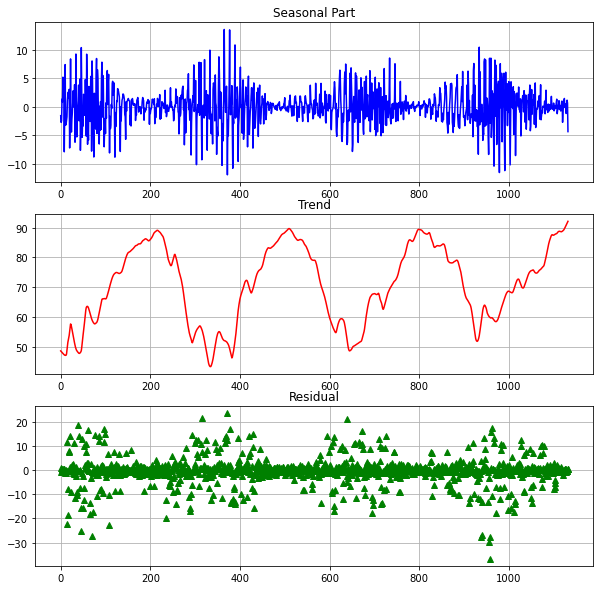

In [130]:
plt.figure(figsize=(10,10))
plt.subplot(3, 1, 1)
plt.plot(S, "b-")
plt.title("Seasonal Part")
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(T, "r-")
plt.title("Trend")
plt.grid(True)


plt.subplot(3,1,3)
plt.plot(E, "g^")
plt.title("Residual")
plt.grid(True)


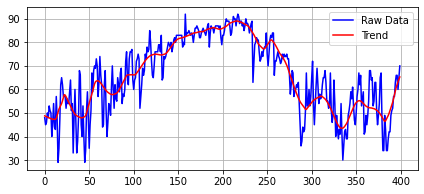

In [133]:
# let us superpose the trend estimation with the data
#let us plot only the first 400 values
T_max = 400 
plt.figure(figsize=(7,3))
plt.plot(avg_temp[:T_max], "b-" , label="Raw Data")
plt.plot(T[:T_max], "r-", label="Trend")
plt.legend()
plt.grid(True)


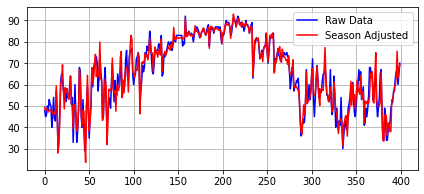

In [134]:
plt.figure(figsize=(7,3))
plt.plot(avg_temp[:T_max], "b-" , label="Raw Data")
plt.plot((T+E)[:T_max], "r-", label="Season Adjusted")
plt.legend()
plt.grid(True)

### Moving Average
y = tsa.filters.filtertools.convolution_filter(x, filt, nsides = 1) is a built in function that 
produces a times series Y where
$y[n] = filt[0]*x[n] + ... + filt[nfilt-1]*x[n-nfilt+1]$

In [138]:
avg_temp_MA = statsmodels.tsa.filters.filtertools.convolution_filter(avg_temp, filt=np.ones(12)/12., nsides = 1)

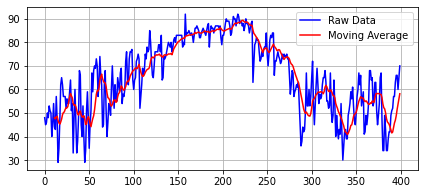

In [139]:
plt.figure(figsize=(7,3))
plt.plot(avg_temp[:T_max], "b-" , label="Raw Data")
plt.plot(avg_temp_MA[:T_max], "r-", label="Moving Average")
plt.legend()
plt.grid(True)
plt.savefig("trend_MA.png", dpi=200)

### Getting rid of a trend: Differentiation

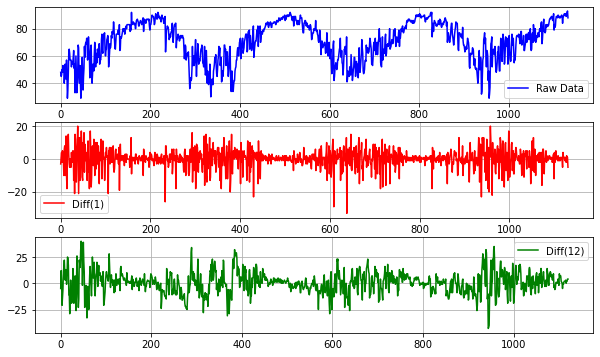

In [153]:
plt.figure(figsize=(10,6))
#let us plot only the T_max first values
data_diff_1 = avg_temp[1:] - avg_temp[:-1]
data_diff_12 = avg_temp[12:] - avg_temp[:-12]

plt.subplot(3,1,1)
plt.plot(avg_temp[:T_max], "b-", label="Raw Data" )
plt.legend()
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(data_diff_1[:T_max] , "r-", label="Diff(1)" )
plt.legend()
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(data_diff_12[:T_max] , "g-", label="Diff(12)" )
plt.legend()
plt.grid(True)


### Visualizing a seasonal pattern

Text(0.5, 1.0, 'Detrended Average Temperature Series')

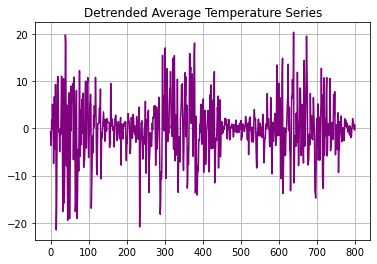

In [203]:
#Removing trend from the raw data
data_detrend = avg_temp - T
T_max = 800
plt.plot(data_detrend[:T_max], "purple")
plt.grid(True)
plt.title("Detrended Average Temperature Series")

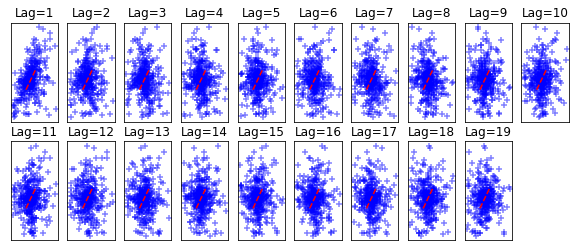

In [212]:
#let us construct scatter plots for lag in between lag=1 and lag=12
plt.figure(figsize=(10,4))
T_max = len(avg_temp) 
for lag in np.arange(1,20):
    plt.subplot(2,10,lag)
    plt.scatter(data_detrend[350:(T_max-365)], data_detrend[lag+350:(T_max-365+lag)], color="blue", marker="+", alpha=0.5)
    plt.plot([-4,4], [-4,4], "r--")  #add a red diagonal
    plt.title(f"Lag={lag}")
    plt.xticks([]) #hide x-label for clarity
    plt.yticks([]) #hide y-label for clarity
    

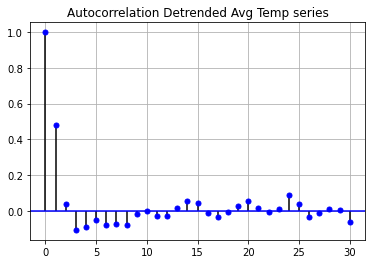

In [209]:
#ACF - Auto Correlation Function for the detrended time series
fig = tsaplots.plot_acf(data_detrend, lags=30, alpha=None, title="Autocorrelation Detrended Avg Temp series", color="blue")
plt.grid(True)


Here we notice that there is a significant spike at a lag of 1 and much lower spikes for the subsequent lags.
Thus, an AR(1) model would likely be feasible for this data set.

### Naive model

This naive model will be a baseline to compare our other approaches to. This model will simply consist of predicting that the temparture in 2 days = the temperature now.

In [89]:
avg_temp = data["TempAvgF"][:].values
avg_temp

array([48., 45., 46., ..., 92., 93., 88.])

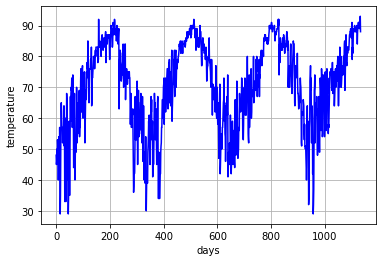

In [90]:
plt.plot(avg_temp, "b-")
plt.xlabel("days")
plt.ylabel("temperature")
plt.grid(True)

In [91]:
#total number of days
n_tot = len(avg_temp)
n_test = int(n_tot * 0.3)
n_train = n_tot - n_test
print(f"n_tot, n_test, n_train = {n_tot, n_test, n_train}")

n_tot, n_test, n_train = (1133, 339, 794)


In [92]:
#subtracting values from 2 days ahead 
errors = avg_temp[:-2] - avg_temp[2:]

#computing RMSE on the last 30% of data
RMSE_naive = np.sqrt(np.mean( errors[-n_test:]**2 ))
print(f"RMSE_naive={RMSE_naive: 2.2f}")

RMSE_naive= 8.09


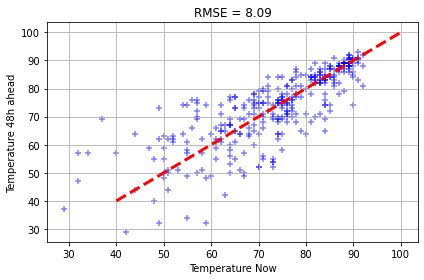

In [93]:
plt.scatter(avg_temp[n_train:-2], avg_temp[n_train+2:], color="blue", marker="+", alpha=0.5)
plt.plot([40,100], [40,100], "r--", lw=3)
plt.xlabel("Temperature Now")
plt.ylabel("Temperature 48h ahead")
plt.grid(True)
plt.title(f"RMSE = {RMSE_naive:2.2f}")

plt.tight_layout()


#### Observation: 
The naive model has a root mean squared error of 8.09 which is extremely high. This shows us that the naive model of predicting temperature 2 days ahead is not a good one. 


### Using the N previous days Average Temperature data 

We would like to fit a model of the type
$$T_{t+2} \approx \alpha_0 \, T_t + \alpha_1 \, T_{t-1} + \ldots + \alpha_0 \, T_{t-10}.$$
That is a simple **linear regression**. We will keep 70% of data to train our model, and save the last 30% to evaluate our model.

In [564]:
#n_train = 794, 70% for training, 30% for test
avg_temp_train = avg_temp[:n_train]
avg_temp_test = avg_temp[n_train:]

In [611]:
def linear_regression(N = 10):
    T = 400
    # append all the covariates in a list
    covariates = []
    for k in range(N+1):
        covariates.append(avg_temp[T-k:n_tot-2-k])
    # concatenate the list of vectors in a big matrix
    X_all = np.column_stack(covariates)
    # store the true values (i.e 2 days ahead) 
    y_all= avg_temp[T+2:n_tot]

    #test/test set
    X_train = X_all[0:400]
    y_train = y_all[0:400]
    X_test = X_all[400:]
    y_test = y_all[400:]
   

    return X_train, y_train, X_test, y_test

In [612]:
#fit a linear regression
from sklearn.linear_model import LinearRegression

In [614]:
N = 10
X_train, y_train, X_test, y_test = linear_regression(N)
lin_reg = LinearRegression().fit(X_train, y_train)

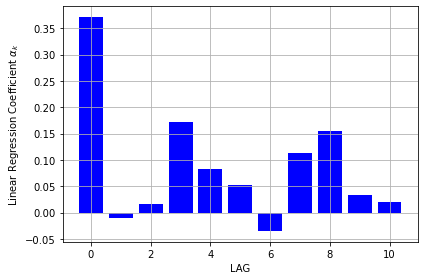

In [615]:
plt.bar(range(N+1), lin_reg.coef_, color="blue")
plt.grid(True)
plt.xlabel("LAG")
plt.ylabel(r"Linear Regression Coefficient $\alpha_k$")

plt.tight_layout()

In [616]:
# make predictions
y_test_pred = lin_reg.predict(X_test)

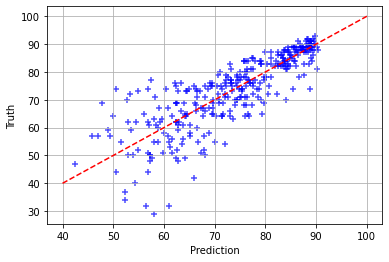

In [617]:
plt.scatter(y_test_pred, y_test, marker="+", color="blue", alpha=0.7)
plt.plot([40,100], [40,100], "r--")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.grid(True)

In [618]:
errors = y_test - y_test_pred
#let us compute the RMSE on the last 30% of data
RMSE = np.sqrt(np.mean( errors**2 ))
print(f"RMSE_LINREG={RMSE: 2.2f}")

RMSE_LINREG= 7.31


In [619]:
# let us check if it is worth adding more (or less days)
days_list = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100]
RMSE_list = []
for N in days_list:
    X_train, y_train, X_test, y_test = linear_regression(N)
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_test_pred = lin_reg.predict(X_test)
    errors = y_test - y_test_pred
    RMSE = np.sqrt(np.mean( errors**2 ))
    RMSE_list.append(RMSE)

Text(0, 0.5, 'RMSE on Test set')

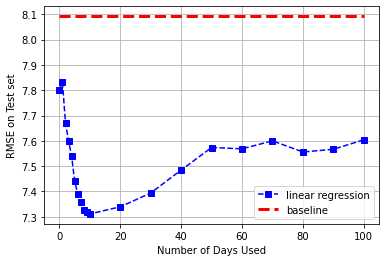

In [620]:
plt.plot(days_list, RMSE_list, "b--s", label="linear regression")
plt.plot(days_list, [RMSE_naive for _ in days_list], "r--", lw=3, label="baseline")
plt.legend()

plt.grid(True)
plt.xlabel("Number of Days Used")
plt.ylabel("RMSE on Test set")


### Using the average of previous year around the same month

In [621]:
#Two-sided moving average 
smoothing_filter = np.ones(100)/100.
MA_temp = statsmodels.tsa.filters.filtertools.convolution_filter(avg_temp, filt=smoothing_filter, nsides = 2)

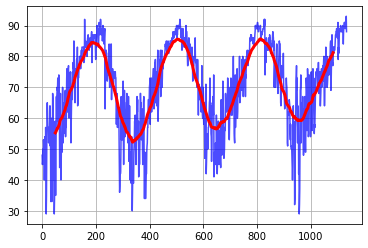

In [599]:
plt.plot(avg_temp, "b-", alpha=0.7)
plt.plot(MA_temp, "r-", lw=3)
plt.grid(True)


In [622]:
np.sqrt(np.mean((avg_temp[n_train:] - temp_MA[n_train-365:-365])**2 ) )

13.836748226188343

In [623]:
# now, let us do a linear regression, using only the temperature data of the last N days, as well as the average of last year

def linear_regression_with_MA(N = 10):
    T = 400

    # append all the covariates in a list
    covariates = []
    for k in range(N+1):
        covariates.append(avg_temp[T-k:n_tot-2-k])
    # also use the average the same day but previous year
    covariates.append(MA_temp[T-365:n_tot-2-365])
    # concatenate the list of vectors in a big matrix
    X_all = np.column_stack(covariates)
    # store the true values
    y_all= avg_temp[T+2:n_tot]

    #test/test set, select 20 to 420 as there are nan values in the first few X_all
    X_train = X_all[20:400]
    y_train = y_all[20:400]
    X_test = X_all[420:]
    y_test = y_all[420:]
    return X_train, y_train, X_test, y_test


In [624]:
# let us check if it is worth adding more (or less days)
days_list = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80, 90, 100]
RMSE_ma_list = []
for N in days_list:
    X_train, y_train, X_test, y_test = linear_regression_with_MA(N)
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_test_pred = lin_reg.predict(X_test)
    errors = y_test - y_test_pred
    
    RMSE_ma = np.sqrt(np.mean( errors**2 ))
    RMSE_ma_list.append(RMSE_ma)

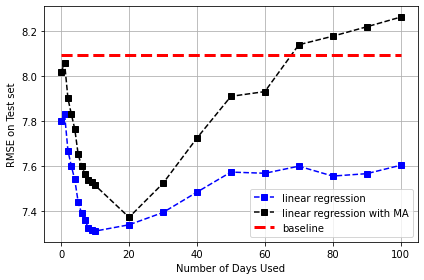

In [625]:
plt.plot(days_list, RMSE_list, "b--s", label="linear regression")
plt.plot(days_list, RMSE_ma_list, "k--s", label="linear regression with MA")

plt.plot(days_list, [RMSE_naive for _ in days_list], "r--", lw=3, label="baseline")

plt.legend()

plt.grid(True)
plt.xlabel("Number of Days Used")
plt.ylabel("RMSE on Test set")

plt.tight_layout()


### Exponential smoothing of Covariates

In [631]:
plt.plot=(avg_temp, "b-", alpha=0.5)
SES_1 = SimpleExpSmoothing(avg_temp).fit(smoothing_level=0.1,optimized=True).fittedvalues
SES_2 = SimpleExpSmoothing(avg_temp).fit(smoothing_level=0.01,optimized=True).fittedvalues

plt.plot(SES_1, "r-", lw=2, label="Smoothing_1")
plt.plot(SES_2, "k-", lw=2, label="Smoothing_2")

plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig("jena_LR_smoothing.pdf")

SyntaxError: invalid syntax (<ipython-input-631-abe85572f8ed>, line 1)